In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))
X = X[:, [2, 3]]

In [3]:
X.shape

(150, 2)

In [4]:
y.shape

(150,)

## 데이터의 분할 : 훈련용 vs 테스트용

In [5]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y) # 훈련용과 테스트용 2개로 나눠짐

In [14]:
pd.Series(y_train).value_counts()

0    35
1    35
2    35
dtype: int64

In [15]:
pd.Series(y_test).value_counts()

0    15
1    15
2    15
dtype: int64

## 데이터 시각화

* x축 : 꽃잎의 길이
* y축 : 꽃잎의 너비
* 각 점의 색깔을 품종마다 다르게 표시
* 훈련용 데이터

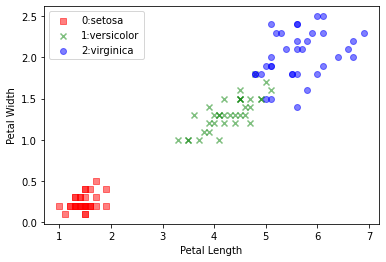

In [25]:
ax = plt.axes()
markers = ['s', 'x', 'o']
colors = ['r', 'g', 'b']
labels = ['0:setosa', '1:versicolor', '2:virginica']
for i in range(3):
    X_sub = X_train[y_train==i]
    ax.scatter(X_sub[:, 0], X_sub[:, 1], alpha=0.5, marker=markers[i], c=colors[i], label=labels[i])
    ax.set(xlabel='Petal Length', ylabel='Petal Width')
    ax.legend()

## 데이터 표준화

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
sc.fit(X_train)

StandardScaler()

In [30]:
X_train_std = sc.transform(X_train)

In [35]:
X_test_std = sc.transform(X_test)

# 로지스틱 회귀

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logistic = LogisticRegression()

In [41]:
logistic.fit(X_train_std, y_train)

LogisticRegression()

In [42]:
logistic.predict(X_train_std[:3, :])

array([0, 0, 2])

In [55]:
logistic.predict_proba(X_train_std[:3, :]) # 0일 확률, 1일 확률, 2일 확률

array([[9.59543959e-01, 4.04522758e-02, 3.76537919e-06],
       [9.40769396e-01, 5.92226306e-02, 7.97320867e-06],
       [6.25773725e-05, 6.67508339e-02, 9.33186589e-01]])

In [43]:
y_train[:3]

array([0, 0, 2])

In [46]:
logistic.score(X_train_std, y_train) # 정확도 = accuracy = 정분류율

0.9428571428571428

In [49]:
logistic.score(X_test_std, y_test) # 과대적합 X, 과소적합 X

0.9777777777777777

In [50]:
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = logistic.predict(X_test_std) #테스트 데이터에 대한 예측값
confusion_matrix(y_test, y_pred) # 실제값, 예측값

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)